In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2121728/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [7]:
train_labels[10]

3

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
# converting labels to one hot encoding

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
# build model

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
# compile model

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
# training model

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 41ms/step - loss: 2.5394 - accuracy: 0.5060 - val_loss: 1.6875 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.3954 - accuracy: 0.7110 - val_loss: 1.3067 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.0473 - accuracy: 0.7706 - val_loss: 1.1444 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 0s 30ms/step - loss: 0.8268 - accuracy: 0.8208 - val_loss: 1.0332 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6596 - accuracy: 0.8596 - val_loss: 0.9684 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.5257 - accuracy: 0.8919 - val_loss: 0.9450 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.4240 - accuracy: 0.9116 - val_loss: 0.9002 - val_accuracy: 0.8150
Epoch 8/20
16

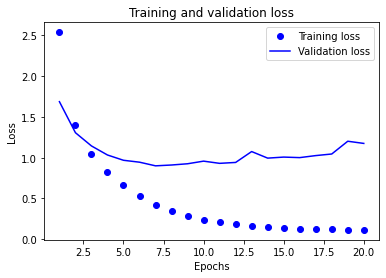

In [16]:
# plot trianing and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

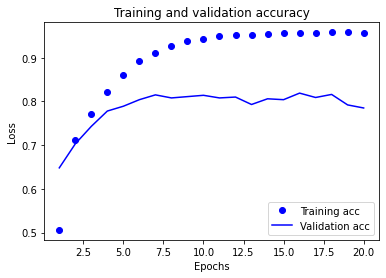

In [23]:
# plotting training and validation accuracy
# print(history.history.keys())
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [25]:
# retrain model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(
    partial_x_train,
  partial_y_train,
  epochs=9,
  batch_size=512,
  validation_data=(x_val, y_val)
  )

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 40ms/step - loss: 2.5486 - accuracy: 0.5173 - val_loss: 1.7134 - val_accuracy: 0.6410
Epoch 2/9
16/16 [==============================] - 0s 30ms/step - loss: 1.3941 - accuracy: 0.7016 - val_loss: 1.3032 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 1s 31ms/step - loss: 1.0350 - accuracy: 0.7781 - val_loss: 1.1298 - val_accuracy: 0.7720
Epoch 4/9
16/16 [==============================] - 0s 30ms/step - loss: 0.8097 - accuracy: 0.8261 - val_loss: 1.0280 - val_accuracy: 0.7910
Epoch 5/9
16/16 [==============================] - 0s 31ms/step - loss: 0.6504 - accuracy: 0.8647 - val_loss: 0.9696 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 0s 31ms/step - loss: 0.5187 - accuracy: 0.8920 - val_loss: 0.9281 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 31ms/step - loss: 0.4172 - accuracy: 0.9137 - val_loss: 0.9279 - val_accuracy: 0.8040
Epoch 8/9
16/16 [===

In [26]:
results

[1.0179873704910278, 0.7818343639373779]

In [29]:
# generate predictions

predictions = model.predict(x_test)
np.sum(predictions[0])

1.0000001

In [30]:
np.argmax(predictions[0])

3